In [ ]:
from bs4 import BeautifulSoup

# Load the HTML file
with open('EDMI.html', 'r') as file:
    soup = BeautifulSoup(file, 'html.parser')

# Find all links with CSV
csv_links = soup.find_all('a', href=lambda href: href and href.endswith('.csv'))

# Print and download the CSV files
for link in csv_links:
    print(link['href'])


/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1130211_FD1_L1_EDMI_1_D.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1130211_FD1_L1_EDMI_1_G.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1315367_FD1_L3_EDMI_2_D.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1315367_FD1_L3_EDMI_2_G.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1619722_FD3_NK_EDMI_3_D.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1619722_FD3_NK_EDMI_3_G.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1621554_FD4_NK_EDMI_4_D.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1621554_FD4_NK_EDMI_4_G.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1623101_FD4_L1_EDMI_5_D.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1623101_FD4_L1_EDMI_5_G.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1623123_FD1_L3_EDMI_6_D.csv
/cgi-bin/data_browser/browse/edc/Electricit

In [ ]:
import pandas as pd

# Read HTML file
tables = pd.read_html('EDMI.html')

# Save tables to CSV
for i, table in enumerate(tables):
    table.to_csv(f'table_{i}.csv', index=False)


In [ ]:
print(f"{len(tables)} tables found and saved as CSV files.")


9 tables found and saved as CSV files.


In [ ]:
from bs4 import BeautifulSoup
import os

# Load the HTML file
with open('EDMI.html', 'r') as file:
    soup = BeautifulSoup(file, 'html.parser')

# Find all links to CSV files
csv_links = soup.find_all('a', href=lambda href: href and href.endswith('.csv'))

# Save the links
for link in csv_links:
    url = link['href']
    # Print or save the relative paths
    print(url)


/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1130211_FD1_L1_EDMI_1_D.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1130211_FD1_L1_EDMI_1_G.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1315367_FD1_L3_EDMI_2_D.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1315367_FD1_L3_EDMI_2_G.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1619722_FD3_NK_EDMI_3_D.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1619722_FD3_NK_EDMI_3_G.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1621554_FD4_NK_EDMI_4_D.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1621554_FD4_NK_EDMI_4_G.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1623101_FD4_L1_EDMI_5_D.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1623101_FD4_L1_EDMI_5_G.csv
/cgi-bin/data_browser/browse/edc/Electricity/NTVV/EPM/EDMI/1623123_FD1_L3_EDMI_6_D.csv
/cgi-bin/data_browser/browse/edc/Electricit

In [ ]:
pip install pandas numpy scikit-learn


In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Path to the HTML file
html_file_path = "EDMI.html"

# Directory to save the downloaded CSV files
download_dir = "downloaded_csvs"
os.makedirs(download_dir, exist_ok=True)

# Read and parse the HTML file
with open(html_file_path, "r", encoding="utf-8") as file:
    soup = BeautifulSoup(file, "html.parser")

# Extract all CSV links
base_url = "https://data.ukedc.rl.ac.uk"
csv_links = [
    base_url + a['href']
    for a in soup.find_all("a", href=True)
    if a['href'].endswith(".csv")
]

# Download CSV files
for url in csv_links:
    file_name = url.split("/")[-1]
    file_path = os.path.join(download_dir, file_name)
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad HTTP status codes
        with open(file_path, "wb") as f:
            f.write(response.content)
        print(f"Downloaded: {file_name}")
    except Exception as e:
        print(f"Failed to download {file_name}: {e}")

# Combine CSV files into a single DataFrame
data_frames = []
for file_name in os.listdir(download_dir):
    if file_name.endswith(".csv"):
        file_path = os.path.join(download_dir, file_name)
        df = pd.read_csv(file_path)
        df['file_name'] = file_name  # Add a column to track the file source
        data_frames.append(df)

if data_frames:
    combined_data = pd.concat(data_frames, axis=0)
    combined_data.to_csv("combined_data.csv", index=False)
    print("All CSV files combined into combined_data.csv")
else:
    print("No CSV files were found to combine.")


Downloaded: 1130211_FD1_L1_EDMI_1_D.csv
Downloaded: 1130211_FD1_L1_EDMI_1_G.csv
Downloaded: 1315367_FD1_L3_EDMI_2_D.csv
Downloaded: 1315367_FD1_L3_EDMI_2_G.csv
Downloaded: 1619722_FD3_NK_EDMI_3_D.csv
Downloaded: 1619722_FD3_NK_EDMI_3_G.csv
Downloaded: 1621554_FD4_NK_EDMI_4_D.csv
Downloaded: 1621554_FD4_NK_EDMI_4_G.csv
Downloaded: 1623101_FD4_L1_EDMI_5_D.csv
Downloaded: 1623101_FD4_L1_EDMI_5_G.csv
Downloaded: 1623123_FD1_L3_EDMI_6_D.csv
Downloaded: 1623123_FD1_L3_EDMI_6_G.csv
Downloaded: 1623189_FD1_L2_EDMI_7_D.csv
Downloaded: 1623189_FD1_L2_EDMI_7_G.csv
Downloaded: 1623189_FD1_L3_EDMI_8_D.csv
Downloaded: 1623189_FD1_L3_EDMI_8_G.csv
Downloaded: 1623189_FD1_NK_EDMI_10_D.csv
Downloaded: 1623189_FD1_NK_EDMI_10_G.csv
Downloaded: 1623189_FD1_NK_EDMI_9_D.csv
Downloaded: 1623189_FD1_NK_EDMI_9_G.csv
Downloaded: 1623189_FD2_NK_EDMI_11_D.csv
Downloaded: 1623189_FD2_NK_EDMI_11_G.csv
Downloaded: 1625460_FD3_L1_EDMI_12_D.csv
Downloaded: 1625460_FD3_L1_EDMI_12_G.csv
Downloaded: 1625460_FD3_L2_EDMI_13

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Load the Combined Dataset
file_path = "combined_data.csv"  # Replace with the actual path if needed
data = pd.read_csv(file_path)

# Step 2: Inspect the Data
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Step 3: Preprocessing
# Assuming 'target_column' is the dependent variable, and rest are predictors
target_column = "target_variable"  # Replace with the actual column name
predictors = data.drop(columns=["target_variable", "irrelevant_column1", "irrelevant_column2"])  # Drop irrelevant columns

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Step 4: Split Data into Train and Test Sets
X = predictors
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Model Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Step 8: Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

# Save results if needed
data['Predicted'] = model.predict(predictors)
data.to_csv("regression_results.csv", index=False)
print("Regression results saved to regression_results.csv")


Dataset Head:
  timestamp (dd/mm/yyyy hh:mm:ss)   energy (Wh)                     file_name
0             23/02/2013 00:30:00           289  1625460_FD3_L2_EDMI_13_D.csv
1             23/02/2013 01:00:00           170  1625460_FD3_L2_EDMI_13_D.csv
2             23/02/2013 01:30:00           136  1625460_FD3_L2_EDMI_13_D.csv
3             23/02/2013 02:00:00           135  1625460_FD3_L2_EDMI_13_D.csv
4             23/02/2013 02:30:00           142  1625460_FD3_L2_EDMI_13_D.csv

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31592994 entries, 0 to 31592993
Data columns (total 3 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   timestamp (dd/mm/yyyy hh:mm:ss)  object
 1    energy (Wh)                     int64 
 2   file_name                        object
dtypes: int64(1), object(2)
memory usage: 723.1+ MB
None

Summary Statistics:
        energy (Wh)
count  3.159299e+07
mean   1.255215e+02
std    2.890401e+02
min   

KeyError: "['target_variable', 'irrelevant_column1', 'irrelevant_column2'] not found in axis"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the combined dataset
data = pd.read_csv("combined_data.csv")

# Define target and predictor variables
target_column = "energy (Wh)"
predictors = data.drop(columns=["timestamp (dd/mm/yyyy hh:mm:ss)", "file_name", target_column])

# Handle missing values if any
predictors = predictors.fillna(predictors.mean())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, data[target_column], test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


KeyError: "['energy (Wh)'] not found in axis"

In [ ]:
print(data.columns)


Index(['timestamp (dd/mm/yyyy hh:mm:ss)', ' energy (Wh)', 'file_name'], dtype='object')


X_train shape: (25274395, 5)
y_train shape: (25274395,)
Mean Squared Error (MSE): 82944.48357817825
R-squared (R2): 0.009004482888671173


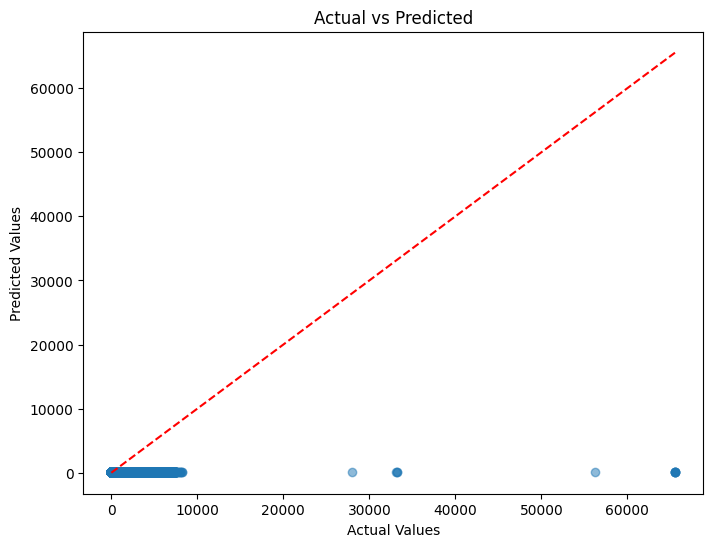

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the combined dataset
data = pd.read_csv("combined_data.csv")

# Strip spaces from column names
data.columns = data.columns.str.strip()

# Convert the timestamp column to a datetime object
data['timestamp (dd/mm/yyyy hh:mm:ss)'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'], format='%d/%m/%Y %H:%M:%S')

# Create time-based features
data['hour'] = data['timestamp (dd/mm/yyyy hh:mm:ss)'].dt.hour
data['day'] = data['timestamp (dd/mm/yyyy hh:mm:ss)'].dt.day
data['month'] = data['timestamp (dd/mm/yyyy hh:mm:ss)'].dt.month
data['year'] = data['timestamp (dd/mm/yyyy hh:mm:ss)'].dt.year
data['day_of_week'] = data['timestamp (dd/mm/yyyy hh:mm:ss)'].dt.dayofweek

# Drop irrelevant columns
target_column = "energy (Wh)"
timestamp_column = "timestamp (dd/mm/yyyy hh:mm:ss)"
file_column = "file_name"

# Define predictors
predictors = data.drop(columns=[timestamp_column, file_column, target_column])

# Handle missing values if any
predictors = predictors.fillna(predictors.mean())
data[target_column] = data[target_column].fillna(data[target_column].mean())

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, data[target_column], test_size=0.2, random_state=42)

# Ensure train/test sets are not empty
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()




Mean Squared Error (MSE): 6902.88056097159
R-squared (R2): 0.005144696823692896


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


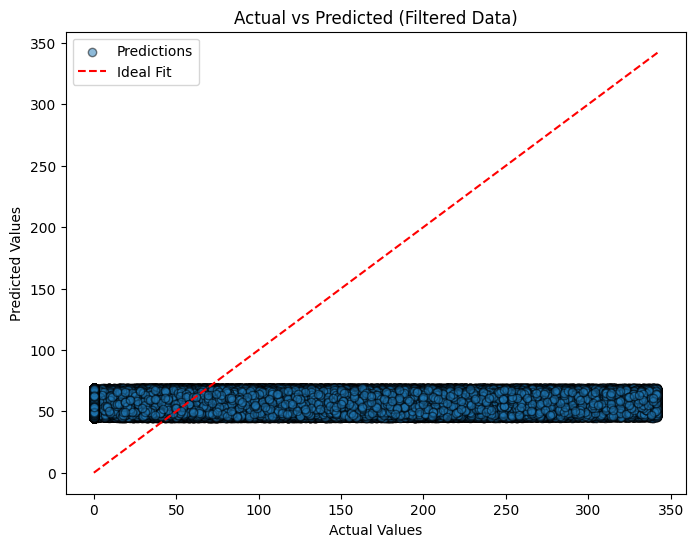

In [ ]:
# Remove extreme outliers in the target variable
q1 = data[target_column].quantile(0.25)
q3 = data[target_column].quantile(0.75)
iqr = q3 - q1

# Define upper and lower bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter data
filtered_data = data[(data[target_column] >= lower_bound) & (data[target_column] <= upper_bound)]

# Update predictors and target after outlier removal
X = filtered_data[predictors.columns]
y = filtered_data[target_column]

# Split filtered data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Enhanced scatter plot for actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Filtered Data)")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("combined_data.csv")

# Extract time-based features
data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'])
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month

# Aggregate data to compute average energy by time of day
grouped = data.groupby(['hour', 'day', 'month'])['energy (Wh)'].mean().reset_index()

# Prepare the data for clustering
features = grouped[['hour', 'energy (Wh)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
grouped['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the Clusters
plt.figure(figsize=(10, 6))
for cluster in grouped['Cluster'].unique():
    cluster_data = grouped[grouped['Cluster'] == cluster]
    plt.scatter(cluster_data['hour'], cluster_data['energy (Wh)'], label=f'Cluster {cluster}')

plt.xlabel("Hour of Day")
plt.ylabel("Average Energy (Wh)")
plt.title("Energy Consumption Clustering by Hour")
plt.legend()
plt.show()


<ipython-input-3-8e998ab6099a>:11: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'])


KeyError: 'Column not found: energy (Wh)'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("combined_data.csv")

# Convert timestamp to datetime and extract features
data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'])
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month

# Aggregate data to compute average energy by time of day
grouped = data.groupby(['hour', 'day', 'month'])['energy (Wh)'].mean().reset_index()

# Prepare the data for clustering
features = grouped[['hour', 'energy (Wh)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust `eps` and `min_samples` if needed
grouped['Cluster'] = dbscan.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
unique_clusters = grouped['Cluster'].unique()
for cluster in unique_clusters:
    cluster_data = grouped[grouped['Cluster'] == cluster]
    if cluster == -1:  # Noise points
        plt.scatter(cluster_data['hour'], cluster_data['energy (Wh)'], label='Noise', color='black')
    else:
        plt.scatter(cluster_data['hour'], cluster_data['energy (Wh)'], label=f'Cluster {cluster}')

plt.xlabel("Hour of Day")
plt.ylabel("Average Energy (Wh)")
plt.title("DBSCAN Clustering of Energy Consumption")
plt.legend()
plt.show()

# Save clustered data to CSV
grouped.to_csv("dbscan_clustered_data.csv", index=False)
print("Clustered data saved to 'dbscan_clustered_data.csv'")


<ipython-input-4-5fcae2c51ea1>:11: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'])


KeyError: 'Column not found: energy (Wh)'

Cleaned Column Names:
Index(['timestamp (dd/mm/yyyy hh:mm:ss)', 'energy (Wh)', 'file_name'], dtype='object')


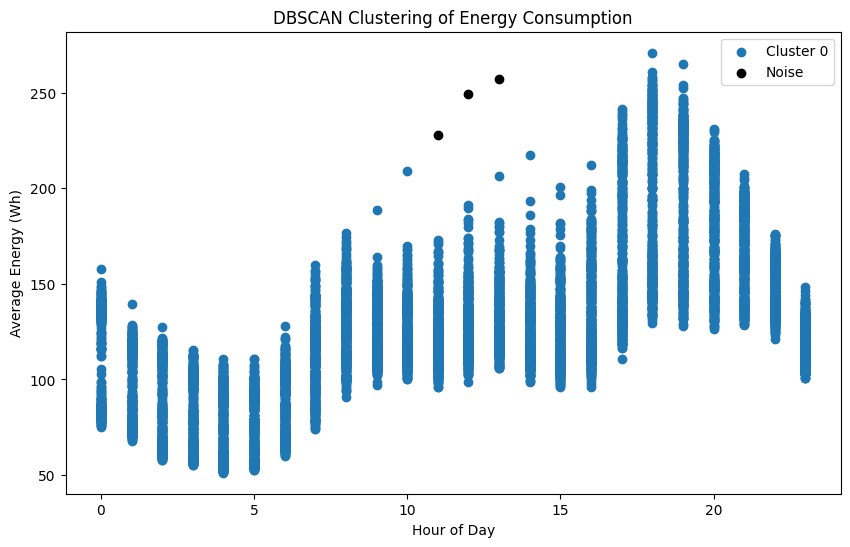

Clustered data saved to 'dbscan_clustered_data.csv'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("combined_data.csv")

# Clean column names
data.columns = data.columns.str.strip()  # Remove leading/trailing whitespace

# Check the column names
print("Cleaned Column Names:")
print(data.columns)

# Convert timestamp to datetime and extract features
data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'], dayfirst=True)
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month

# Verify that the 'energy (Wh)' column exists and is numeric
if 'energy (Wh)' not in data.columns:
    raise KeyError("'energy (Wh)' column not found in the dataset.")

if not np.issubdtype(data['energy (Wh)'].dtype, np.number):
    data['energy (Wh)'] = pd.to_numeric(data['energy (Wh)'], errors='coerce')

# Drop rows with missing or invalid energy values
data = data.dropna(subset=['energy (Wh)'])

# Aggregate data to compute average energy by time of day
grouped = data.groupby(['hour', 'day', 'month'])['energy (Wh)'].mean().reset_index()

# Prepare the data for clustering
features = grouped[['hour', 'energy (Wh)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust `eps` and `min_samples` if needed
grouped['Cluster'] = dbscan.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
unique_clusters = grouped['Cluster'].unique()
for cluster in unique_clusters:
    cluster_data = grouped[grouped['Cluster'] == cluster]
    if cluster == -1:  # Noise points
        plt.scatter(cluster_data['hour'], cluster_data['energy (Wh)'], label='Noise', color='black')
    else:
        plt.scatter(cluster_data['hour'], cluster_data['energy (Wh)'], label=f'Cluster {cluster}')

plt.xlabel("Hour of Day")
plt.ylabel("Average Energy (Wh)")
plt.title("DBSCAN Clustering of Energy Consumption")
plt.legend()
plt.show()

# Save clustered data to CSV
grouped.to_csv("dbscan_clustered_data.csv", index=False)
print("Clustered data saved to 'dbscan_clustered_data.csv'")


In [ ]:
dbscan = DBSCAN(eps=1.0, min_samples=3)


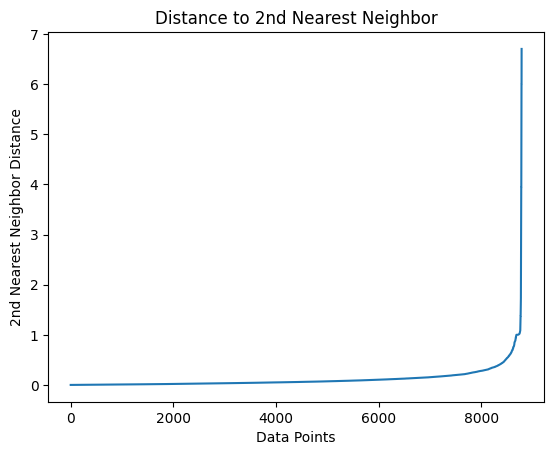

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Find nearest neighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(features)
distances, indices = neighbors_fit.kneighbors(features)

# Sort and plot distances
distances = np.sort(distances[:, 1])  # Distances to the second nearest neighbor
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('2nd Nearest Neighbor Distance')
plt.title('Distance to 2nd Nearest Neighbor')
plt.show()


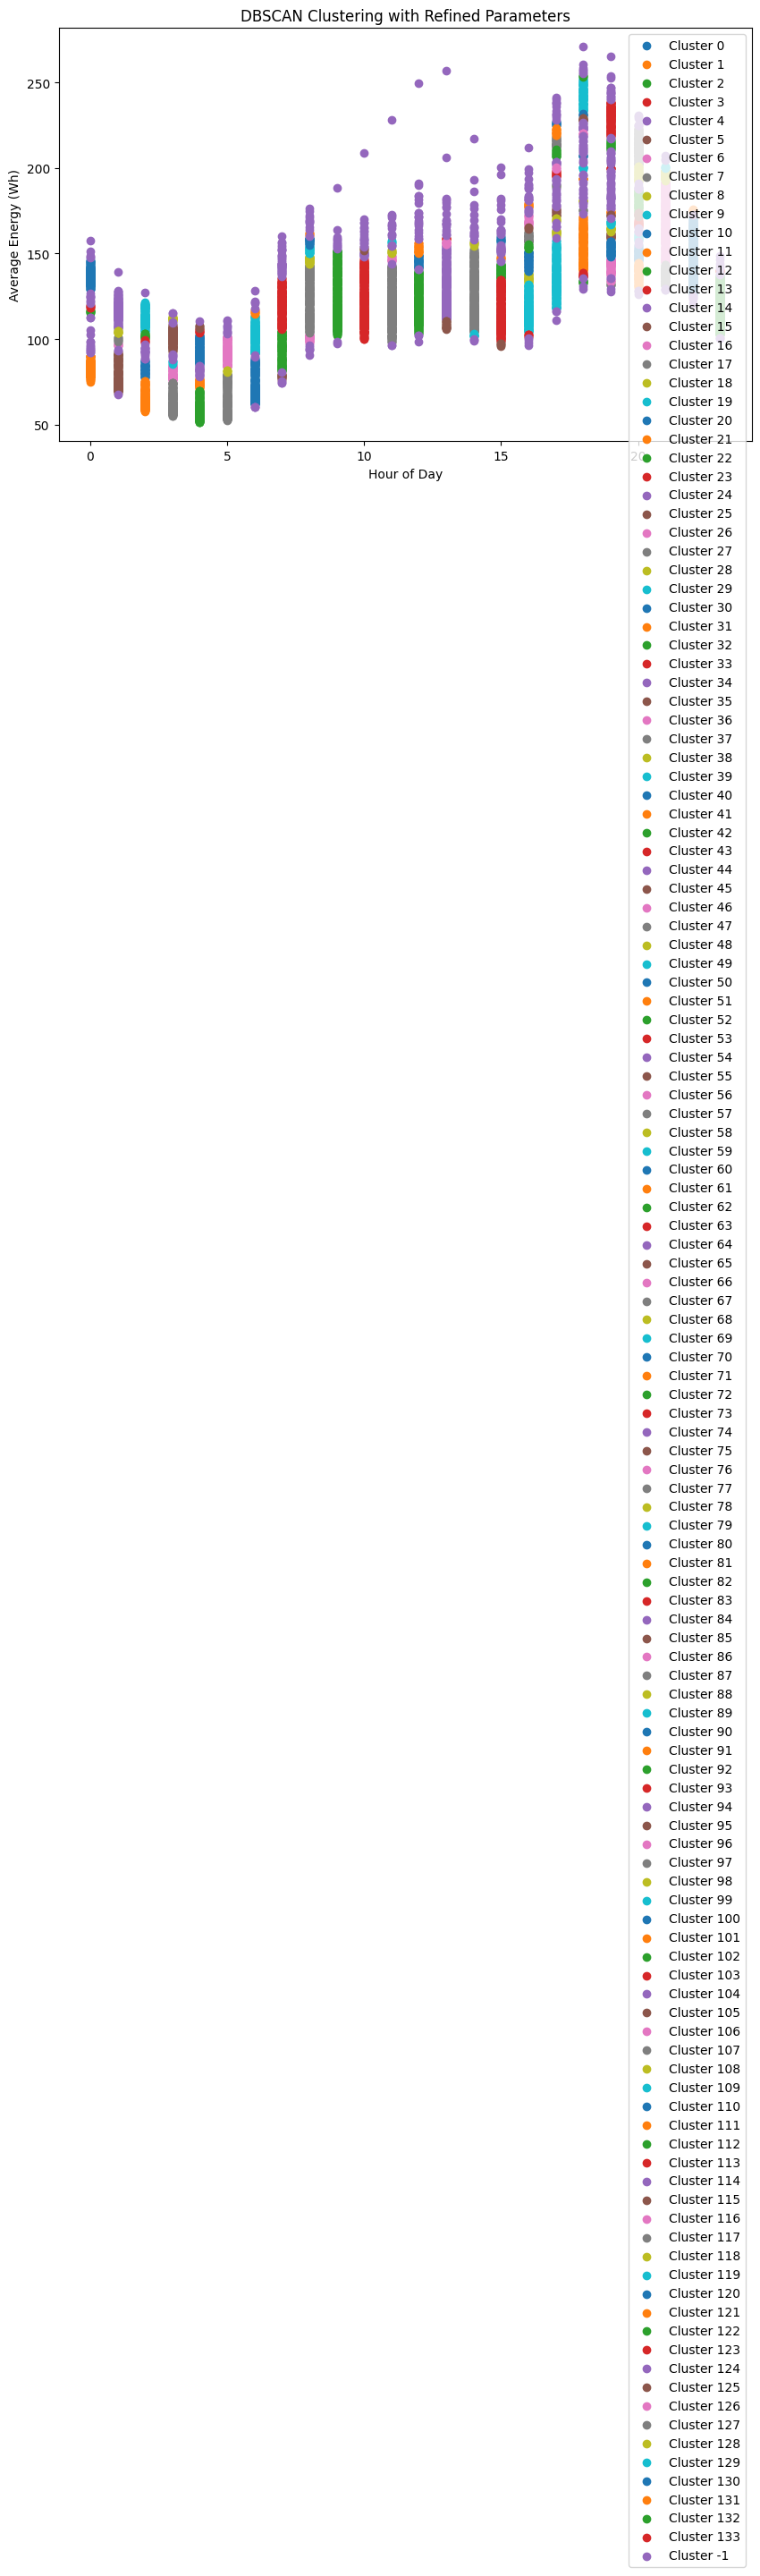

In [ ]:
from sklearn.cluster import DBSCAN

# Update DBSCAN parameters
dbscan = DBSCAN(eps=1.0, min_samples=5)  # Adjust eps and min_samples here
clusters = dbscan.fit_predict(features)

# Add cluster labels to the DataFrame
grouped['Cluster'] = clusters

# Visualize clusters again
plt.figure(figsize=(10, 6))
for cluster_label in set(clusters):
    cluster_data = grouped[grouped['Cluster'] == cluster_label]
    plt.scatter(cluster_data['hour'], cluster_data['energy (Wh)'], label=f'Cluster {cluster_label}')
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy (Wh)")
plt.legend()
plt.title("DBSCAN Clustering with Refined Parameters")
plt.show()


<ipython-input-5-c1356ef305d6>:14: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'])


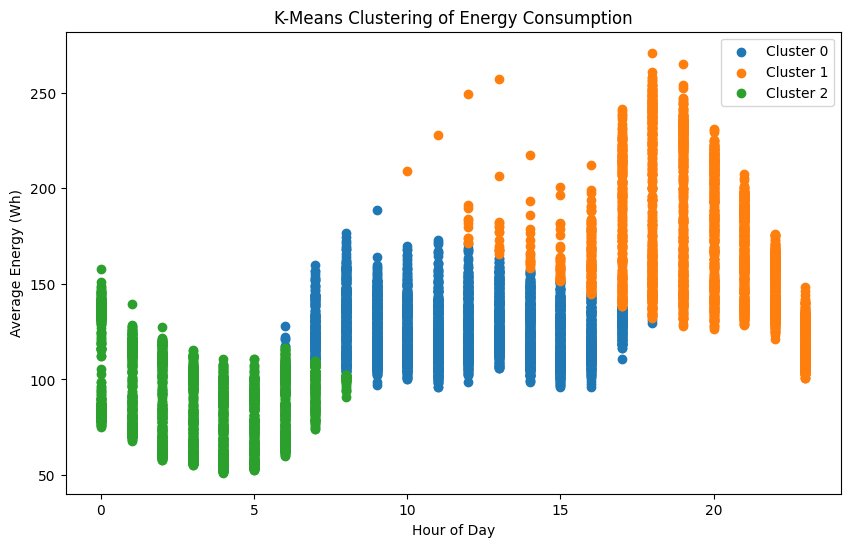

Clustered data saved to 'kmeans_clustered_data.csv'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the combined data
data = pd.read_csv("combined_data.csv")

# Clean column names
data.columns = data.columns.str.strip()

# Extract time-related features
data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'])
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month

# Aggregate data to compute average energy by time of day
grouped = data.groupby(['hour', 'day', 'month'])['energy (Wh)'].mean().reset_index()

# Prepare the data for clustering
features = grouped[['hour', 'energy (Wh)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust `n_clusters` as needed
grouped['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the Clusters
plt.figure(figsize=(10, 6))
for cluster_label in sorted(grouped['Cluster'].unique()):
    cluster_data = grouped[grouped['Cluster'] == cluster_label]
    plt.scatter(cluster_data['hour'], cluster_data['energy (Wh)'], label=f'Cluster {cluster_label}')
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy (Wh)")
plt.title("K-Means Clustering of Energy Consumption")
plt.legend()
plt.show()

# Save the clustered data
grouped.to_csv("kmeans_clustered_data.csv", index=False)
print("Clustered data saved to 'kmeans_clustered_data.csv'")


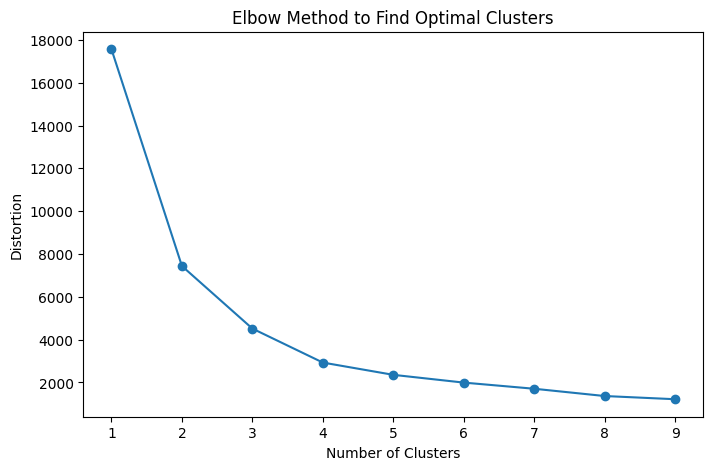

In [ ]:
# Elbow Method to Determine Optimal Number of Clusters
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.title("Elbow Method to Find Optimal Clusters")
plt.show()


Cluster-Wise Energy Statistics:
                mean  median  min    max         std
Cluster                                             
0          91.424141     0.0    0    644  137.663703
1          65.608252     0.0    0    732  104.780066
2        1114.606605   914.0  577  65535  702.341467


<Figure size 1200x600 with 0 Axes>

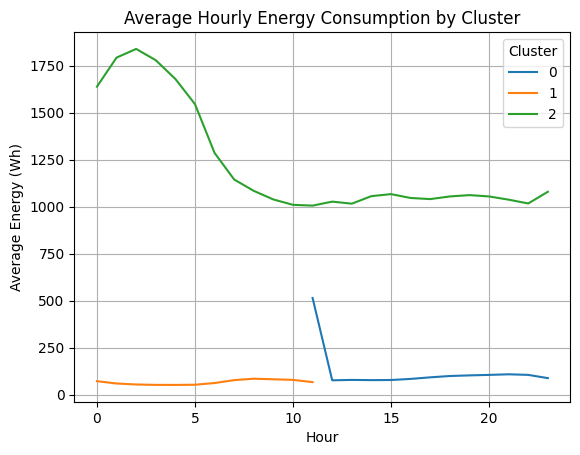

<Figure size 1200x600 with 0 Axes>

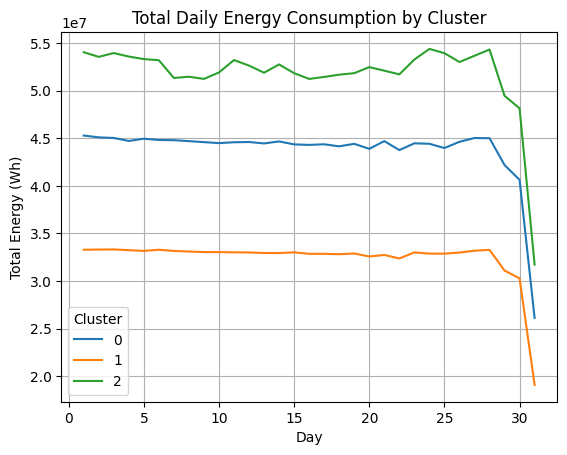

<Figure size 1200x600 with 0 Axes>

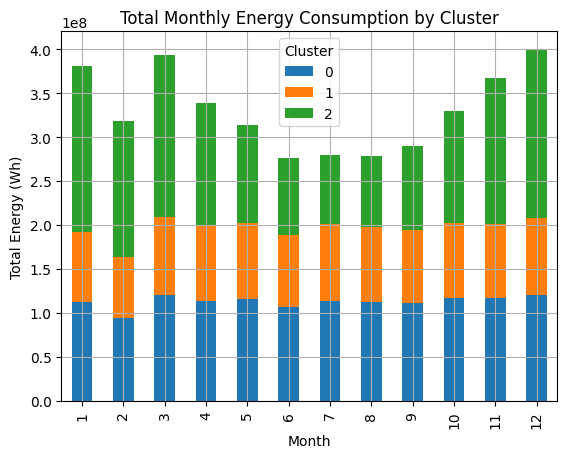

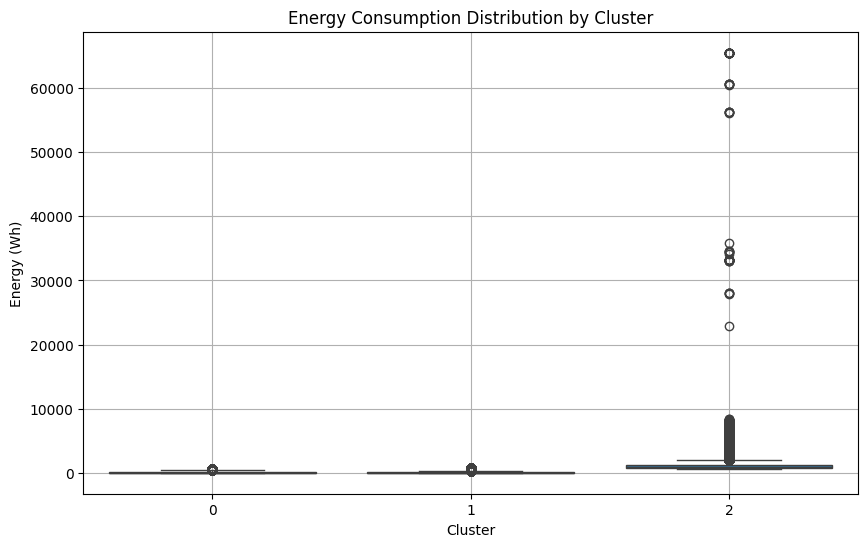

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Ensure the 'Cluster' column exists
if 'Cluster' not in data.columns:
    # Select relevant features for clustering
    features = data[['energy (Wh)', 'hour']]  # Adjust based on relevant columns in your dataset
    features_scaled = StandardScaler().fit_transform(features)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)

    # Add clusters to the data
    data['Cluster'] = clusters

# Cluster-wise energy statistics
cluster_stats = data.groupby('Cluster')['energy (Wh)'].agg(['mean', 'median', 'min', 'max', 'std'])
print("Cluster-Wise Energy Statistics:")
print(cluster_stats)

# Hourly trends for each cluster
hourly_trends = data.groupby(['hour', 'Cluster'])['energy (Wh)'].mean().unstack()
plt.figure(figsize=(12, 6))
hourly_trends.plot(kind='line', title='Average Hourly Energy Consumption by Cluster')
plt.xlabel('Hour')
plt.ylabel('Average Energy (Wh)')
plt.grid()
plt.legend(title="Cluster")
plt.show()

# Daily trends for each cluster
daily_trends = data.groupby(['day', 'Cluster'])['energy (Wh)'].sum().unstack()
plt.figure(figsize=(12, 6))
daily_trends.plot(kind='line', title='Total Daily Energy Consumption by Cluster')
plt.xlabel('Day')
plt.ylabel('Total Energy (Wh)')
plt.grid()
plt.legend(title="Cluster")
plt.show()

# Monthly trends for each cluster
monthly_trends = data.groupby(['month', 'Cluster'])['energy (Wh)'].sum().unstack()
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='bar', title='Total Monthly Energy Consumption by Cluster', stacked=True)
plt.xlabel('Month')
plt.ylabel('Total Energy (Wh)')
plt.legend(title="Cluster")
plt.grid()
plt.show()

# Distribution of energy consumption by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='energy (Wh)', data=data)
plt.title('Energy Consumption Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Energy (Wh)')
plt.grid()
plt.show()

# Scatter plot for hourly energy distribution
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hour', y='energy (Wh)', hue='Cluster', data=data, palette='viridis')
plt.title('Hourly Energy Distribution by Cluster')
plt.xlabel('Hour')
plt.ylabel('Energy (Wh)')
plt.grid()
plt.legend(title="Cluster")
plt.show()


Columns in dataset: Index(['timestamp (dd/mm/yyyy hh:mm:ss)', 'energy (Wh)', 'file_name',
       'timestamp', 'hour', 'day', 'month'],
      dtype='object')
Cluster-Wise Energy Statistics:
                mean  median  min    max         std
Cluster                                             
0          91.032361     0.0    0    641  137.005379
1          65.568693     0.0    0    729  104.646568
2        1110.483900   910.0  573  65535  702.932307


<Figure size 1200x600 with 0 Axes>

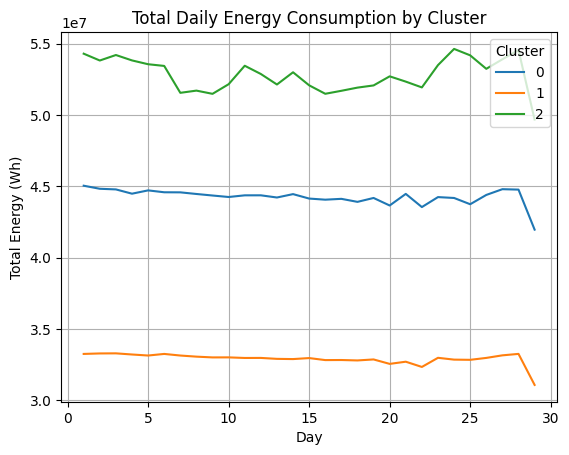

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('combined_data.csv')

# Parse the timestamp
data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'], dayfirst=True)
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month

# Clean column names
data.columns = data.columns.str.strip()

# Remove data for the last day (Day 30) if the data shows incomplete records
data = data[data['day'] < 30]

# Verify available columns
print("Columns in dataset:", data.columns)

# Ensure the 'Cluster' column exists
if 'Cluster' not in data.columns:
  # Check if 'energy (Wh)' exists and correct the column name if necessary
    if 'energy (Wh)' not in data.columns:
        raise ValueError("The column 'energy (Wh)' is not found in the dataset. Check column names.")

    # Select relevant features for clustering
    features = data[['energy (Wh)', 'hour']]  # Adjust based on relevant columns in your dataset
    features_scaled = StandardScaler().fit_transform(features)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(features_scaled)

    # Add clusters to the data
    data['Cluster'] = clusters

# Cluster-wise energy statistics
cluster_stats = data.groupby('Cluster')['energy (Wh)'].agg(['mean', 'median', 'min', 'max', 'std'])
print("Cluster-Wise Energy Statistics:")
print(cluster_stats)

# Daily trends for each cluster
daily_trends = data.groupby(['day', 'Cluster'])['energy (Wh)'].sum().unstack()
plt.figure(figsize=(12, 6))
daily_trends.plot(kind='line', title='Total Daily Energy Consumption by Cluster')
plt.xlabel('Day')
plt.ylabel('Total Energy (Wh)')
plt.grid()
plt.legend(title="Cluster")
plt.show()






Column names after cleaning: Index(['timestamp (dd/mm/yyyy hh:mm:ss)', 'energy (Wh)', 'file_name',
       'timestamp', 'hour', 'day', 'month'],
      dtype='object')


<ipython-input-6-fbfd5749bc6e>:12: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'])


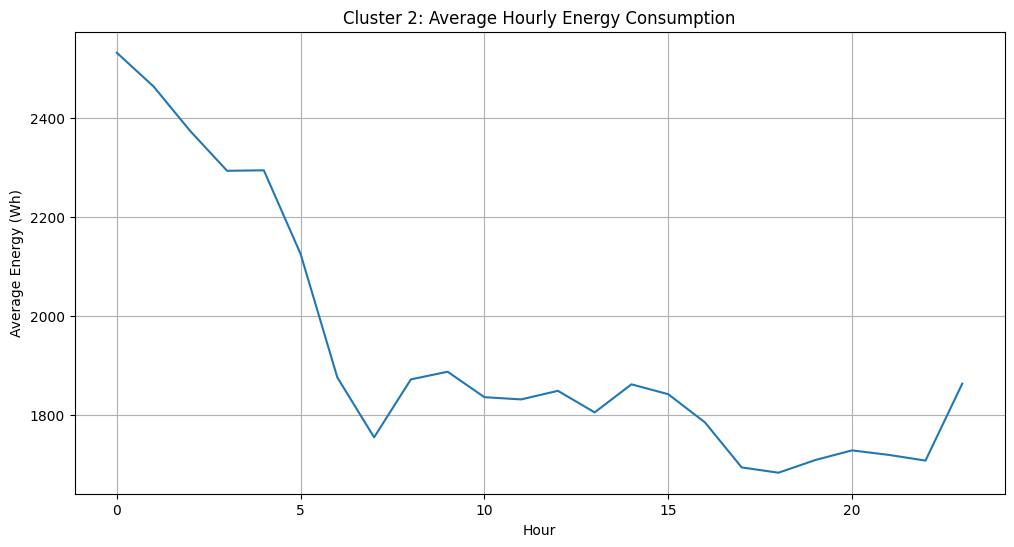

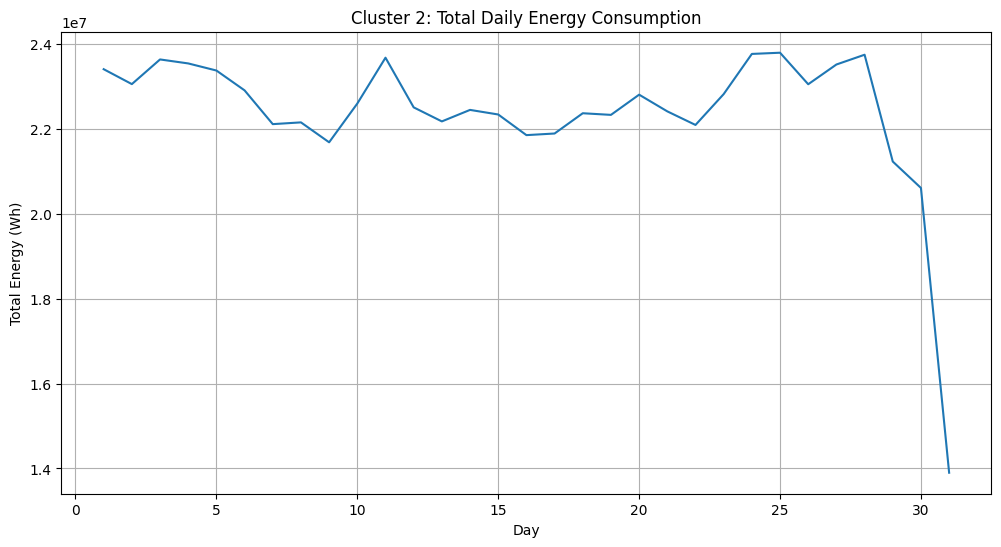

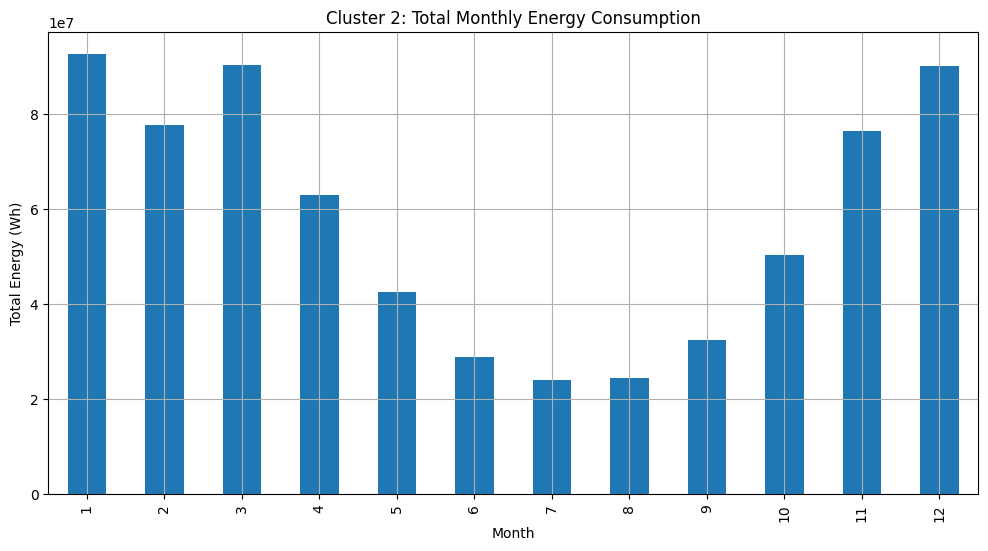

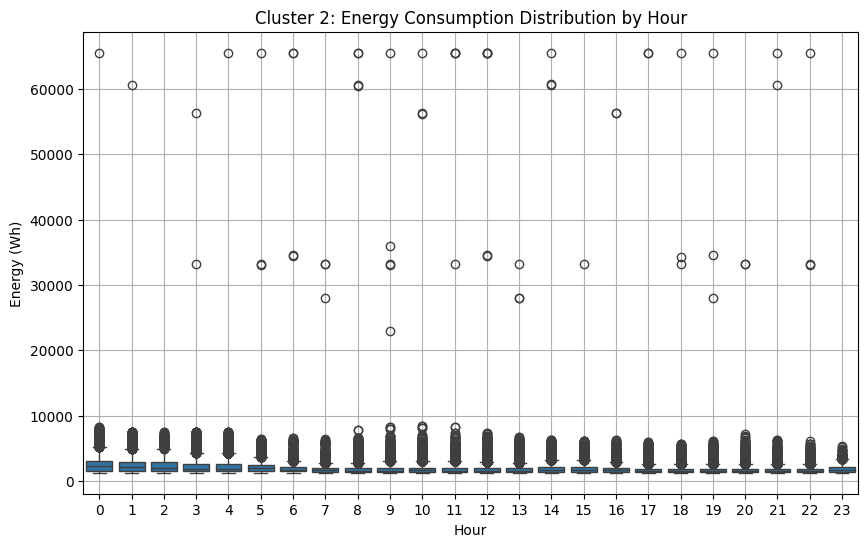

Peak Hour: 0, Average Energy Consumption: 2532.090701654307 Wh
Peak Day: 25, Total Energy Consumption: 23792615 Wh


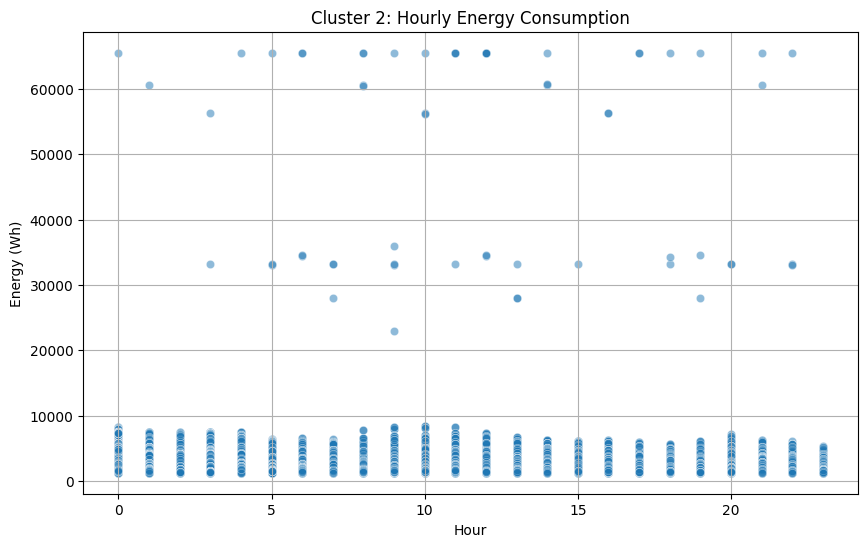

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# Step 0.1: Clean column names
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces
print("Column names after cleaning:", data.columns)

# Parse the timestamp
data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'])
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month

# Verify if the required columns are present
if 'energy (Wh)' not in data.columns:
    raise KeyError("'energy (Wh)' column is missing from the dataset.")

# Perform K-Means clustering if 'Cluster' column is missing
if 'Cluster' not in data.columns:
    kmeans = KMeans(n_clusters=3, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[['energy (Wh)', 'hour']])

# Step 1: Filter data for Cluster 2
cluster_2_data = data[data['Cluster'] == 2]

# Step 2: Hourly Trends
hourly_trends_cluster_2 = cluster_2_data.groupby('hour')['energy (Wh)'].mean()
plt.figure(figsize=(12, 6))
hourly_trends_cluster_2.plot(kind='line', title='Cluster 2: Average Hourly Energy Consumption')
plt.xlabel('Hour')
plt.ylabel('Average Energy (Wh)')
plt.grid()
plt.show()

# Step 3: Daily Trends
daily_trends_cluster_2 = cluster_2_data.groupby('day')['energy (Wh)'].sum()
plt.figure(figsize=(12, 6))
daily_trends_cluster_2.plot(kind='line', title='Cluster 2: Total Daily Energy Consumption')
plt.xlabel('Day')
plt.ylabel('Total Energy (Wh)')
plt.grid()
plt.show()

# Step 4: Monthly Trends
monthly_trends_cluster_2 = cluster_2_data.groupby('month')['energy (Wh)'].sum()
plt.figure(figsize=(12, 6))
monthly_trends_cluster_2.plot(kind='bar', title='Cluster 2: Total Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Total Energy (Wh)')
plt.grid()
plt.show()

# Step 5: Distribution Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='energy (Wh)', data=cluster_2_data)
plt.title('Cluster 2: Energy Consumption Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Energy (Wh)')
plt.grid()
plt.show()

# Step 6: Peak Hours and Days
peak_hour = hourly_trends_cluster_2.idxmax()
peak_hour_value = hourly_trends_cluster_2.max()
print(f"Peak Hour: {peak_hour}, Average Energy Consumption: {peak_hour_value} Wh")

peak_day = daily_trends_cluster_2.idxmax()
peak_day_value = daily_trends_cluster_2.max()
print(f"Peak Day: {peak_day}, Total Energy Consumption: {peak_day_value} Wh")

# Step 7: Scatter Plot for Hourly Consumption
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hour', y='energy (Wh)', data=cluster_2_data, alpha=0.5)
plt.title('Cluster 2: Hourly Energy Consumption')
plt.xlabel('Hour')
plt.ylabel('Energy (Wh)')
plt.grid()
plt.show()





Column names after cleaning: Index(['timestamp (dd/mm/yyyy hh:mm:ss)', 'energy (Wh)', 'file_name',
       'timestamp', 'hour', 'day', 'month', 'Cluster'],
      dtype='object')


<ipython-input-3-9086eccfa293>:11: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'])


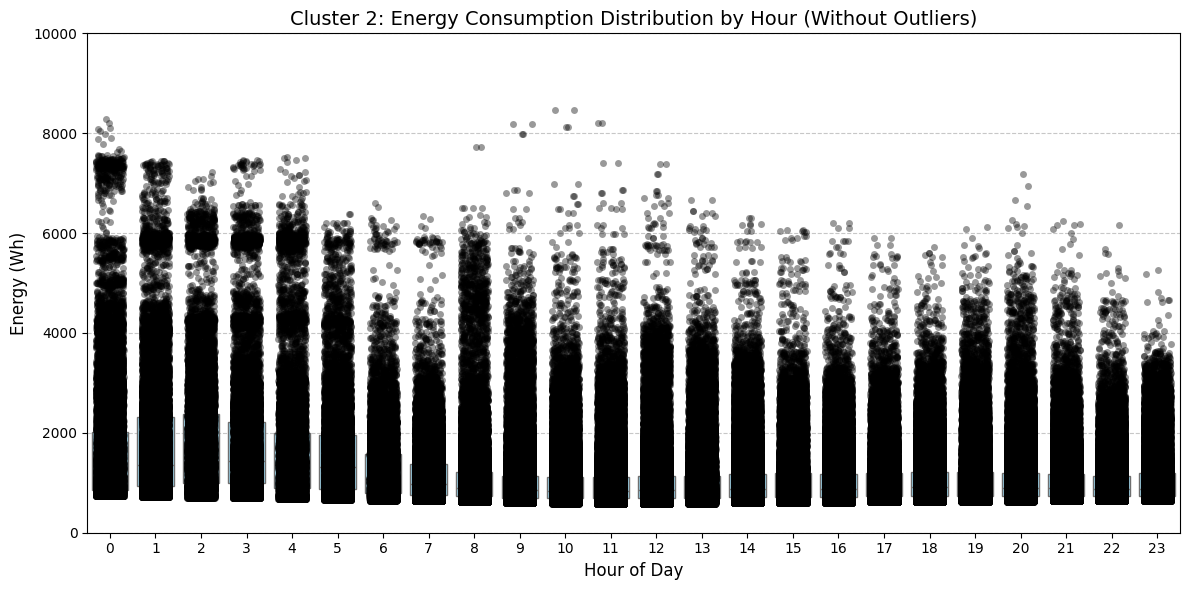

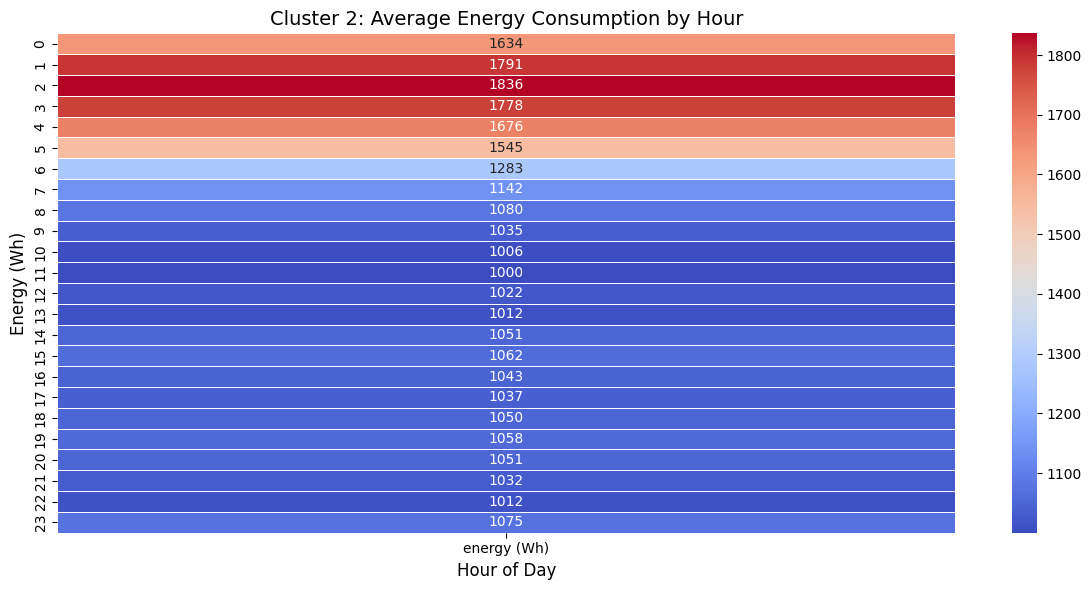

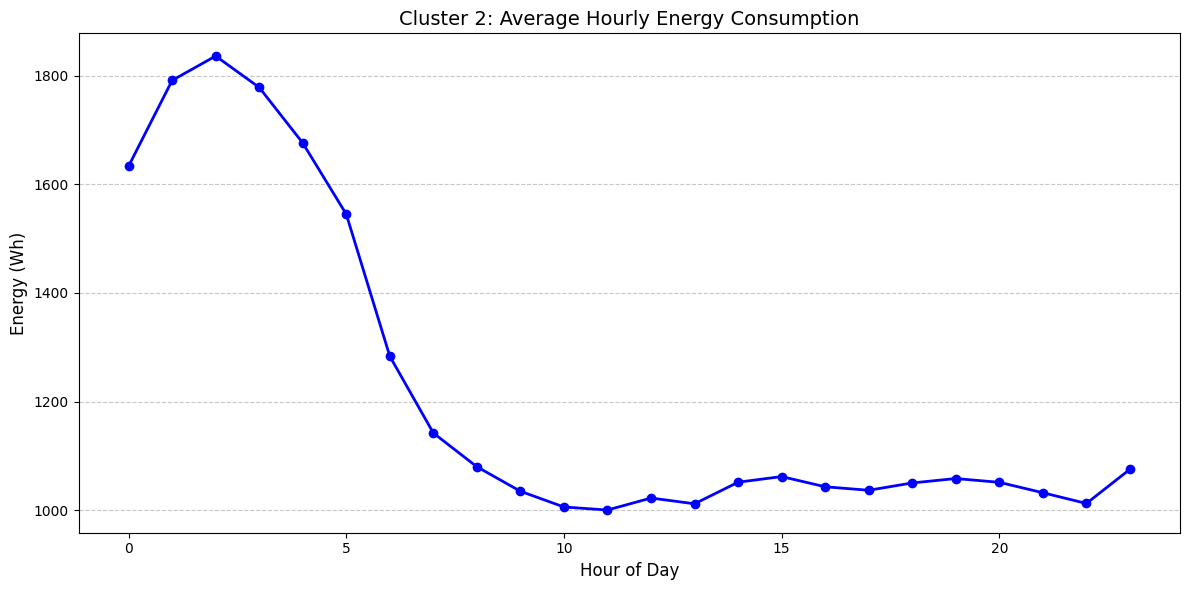

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 0.1: Clean column names
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces
print("Column names after cleaning:", data.columns)

# Parse the timestamp
data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'])
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month

# Verify if the required columns are present
if 'energy (Wh)' not in data.columns:
    raise KeyError("'energy (Wh)' column is missing from the dataset.")

# Perform K-Means clustering if 'Cluster' column is missing
if 'Cluster' not in data.columns:
    kmeans = KMeans(n_clusters=3, random_state=42)
    data['Cluster'] = kmeans.fit_predict(data[['energy (Wh)', 'hour']])

# Step 1: Filter data for Cluster 2
cluster_2_data = data[data['Cluster'] == 2]

# Step 2: Create a more understandable boxplot
plt.figure(figsize=(12, 6))

# Limit the y-axis scale to focus on common values
sns.boxplot(x='hour', y='energy (Wh)', data=cluster_2_data, showfliers=False, color="skyblue")
sns.stripplot(x='hour', y='energy (Wh)', data=cluster_2_data, alpha=0.4, color='black', jitter=0.3)

# Add a title and labels
plt.title('Cluster 2: Energy Consumption Distribution by Hour (Without Outliers)', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Energy (Wh)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add y-axis limits to focus on primary data range
plt.ylim(0, 10000)  # Adjust this limit based on your dataset
plt.tight_layout()

# Show the plot
plt.show()

# Step 3: Create a heatmap for better visualization
heatmap_data = cluster_2_data.pivot_table(index='hour', values='energy (Wh)', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)

# Add title and labels
plt.title('Cluster 2: Average Energy Consumption by Hour', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Energy (Wh)', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Step 4: Create a line plot for energy distribution
hourly_trends = cluster_2_data.groupby('hour')['energy (Wh)'].mean()

plt.figure(figsize=(12, 6))
hourly_trends.plot(kind='line', color='blue', marker='o', linestyle='-', linewidth=2)

# Add title and labels
plt.title('Cluster 2: Average Hourly Energy Consumption', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Energy (Wh)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Analyze Cluster Characteristics
cluster_summary = data.groupby('Cluster').agg({
    'energy (Wh)': ['mean', 'median', 'min', 'max', 'std'],
    'hour': ['mean', 'median'],
    'day': ['mean', 'median']
}).reset_index()

print("Cluster Summary Statistics:")
print(cluster_summary)

# Visualize energy patterns for each cluster
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='energy (Wh)', data=data)
plt.title("Energy Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Energy (Wh)")
plt.show()

# Distribution of clusters
cluster_counts = data['Cluster'].value_counts()
print("Cluster Distribution:")
print(cluster_counts)

# Save clustered data
data.to_csv("kmeans_clustered_data.csv", index=False)
print("Clustered data saved as 'kmeans_clustered_data.csv'.")


KeyError: 'Cluster'

In [ ]:
print(data.columns)


Index(['timestamp (dd/mm/yyyy hh:mm:ss)', 'energy (Wh)', 'file_name',
       'timestamp', 'hour', 'day', 'month'],
      dtype='object')


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
clustering_data = data[['hour', 'energy (Wh)']].copy()

# Standardize the data
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_scaled)

# Add the cluster labels to the original data
data['Cluster'] = clusters


In [ ]:
# Analyze Cluster Characteristics
cluster_summary = data.groupby('Cluster').agg({
    'energy (Wh)': ['mean', 'median', 'min', 'max', 'std'],
    'hour': ['mean', 'median'],
    'day': ['mean', 'median'],
    'month': ['mean', 'median']
})

print(cluster_summary)


         energy (Wh)                                      hour         \
                mean median  min    max         std       mean median   
Cluster                                                                 
0          91.424141    0.0    0    644  137.663703  17.489136   17.0   
1          65.608252    0.0    0    732  104.780066   5.449336    5.0   
2        1114.606605  914.0  577  65535  702.341467  14.138554   15.0   

               day            month         
              mean median      mean median  
Cluster                                     
0        15.712142   16.0  6.610968    7.0  
1        15.709585   16.0  6.614882    7.0  
2        15.745327   16.0  6.412380    6.0  


Cluster Summary Statistics:
  Cluster  energy (Wh)                                      hour         \
                  mean median  min    max         std       mean median   
0       0    91.424141    0.0    0    644  137.663703  17.489136   17.0   
1       1    65.608252    0.0    0    732  104.780066   5.449336    5.0   
2       2  1114.606605  914.0  577  65535  702.341467  14.138554   15.0   

         day         
        mean median  
0  15.712142   16.0  
1  15.709585   16.0  
2  15.745327   16.0  


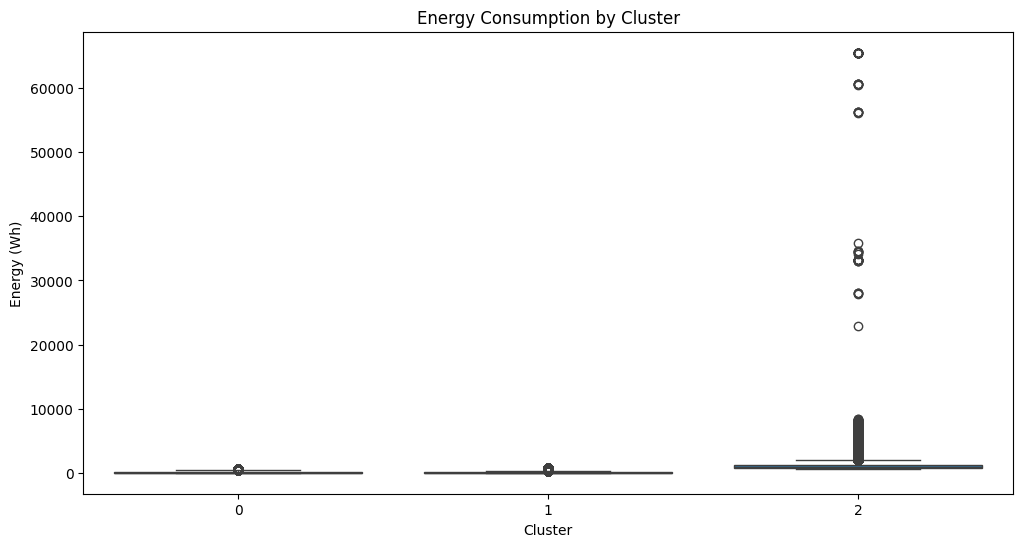

Cluster Distribution:
Cluster
1    15311168
0    14842681
2     1439145
Name: count, dtype: int64


KeyboardInterrupt: 

In [ ]:
# Analyze Cluster Characteristics
cluster_summary = data.groupby('Cluster').agg({
    'energy (Wh)': ['mean', 'median', 'min', 'max', 'std'],
    'hour': ['mean', 'median'],
    'day': ['mean', 'median']
}).reset_index()

print("Cluster Summary Statistics:")
print(cluster_summary)

# Visualize energy patterns for each cluster
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='energy (Wh)', data=data)
plt.title("Energy Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Energy (Wh)")
plt.show()

# Distribution of clusters
cluster_counts = data['Cluster'].value_counts()
print("Cluster Distribution:")
print(cluster_counts)

# Save clustered data
data.to_csv("kmeans_clustered_data.csv", index=False)
print("Clustered data saved as 'kmeans_clustered_data.csv'.")


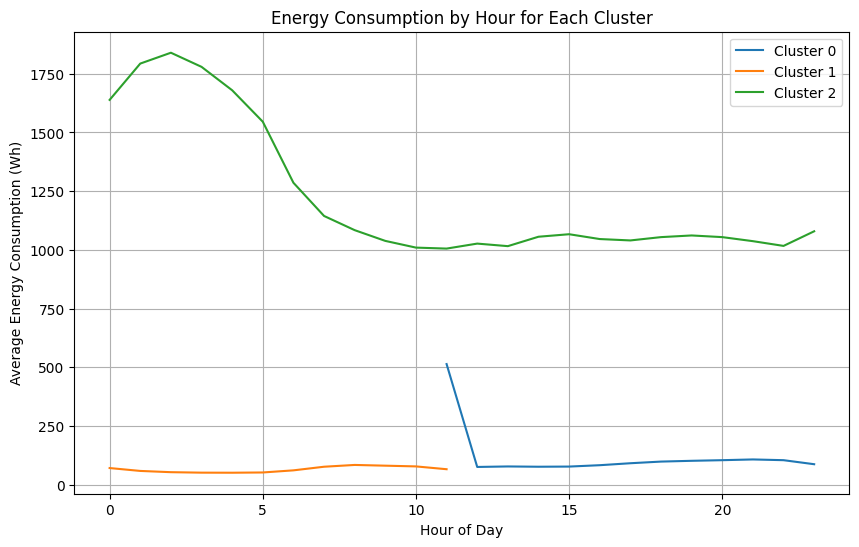

In [ ]:
import matplotlib.pyplot as plt

# Plot average energy consumption by hour for each cluster
plt.figure(figsize=(10, 6))
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster].groupby('hour')['energy (Wh)'].mean()
    plt.plot(cluster_data.index, cluster_data.values, label=f"Cluster {cluster}")

plt.xlabel("Hour of Day")
plt.ylabel("Average Energy Consumption (Wh)")
plt.title("Energy Consumption by Hour for Each Cluster")
plt.legend()
plt.grid()
plt.show()


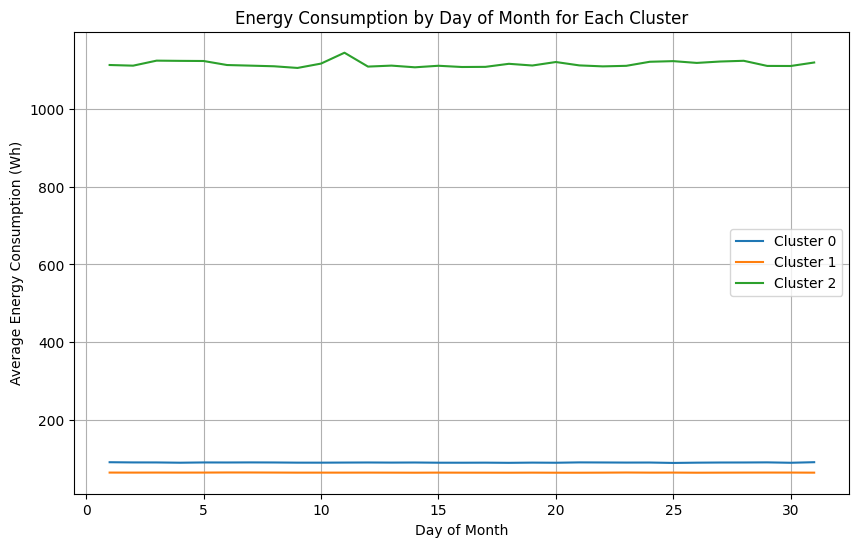

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster].groupby('day')['energy (Wh)'].mean()
    plt.plot(cluster_data.index, cluster_data.values, label=f"Cluster {cluster}")

plt.xlabel("Day of Month")
plt.ylabel("Average Energy Consumption (Wh)")
plt.title("Energy Consumption by Day of Month for Each Cluster")
plt.legend()
plt.grid()
plt.show()


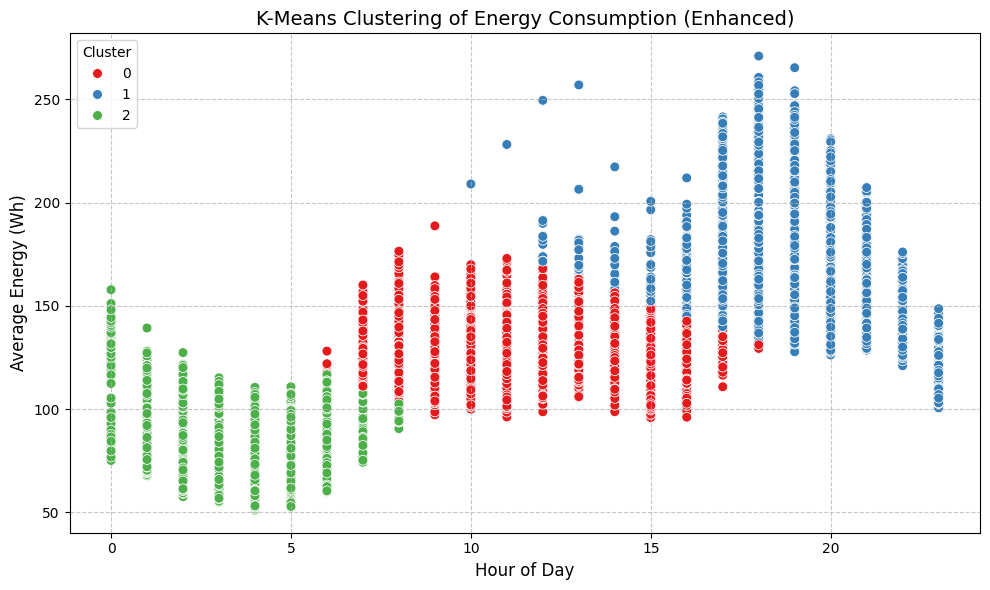

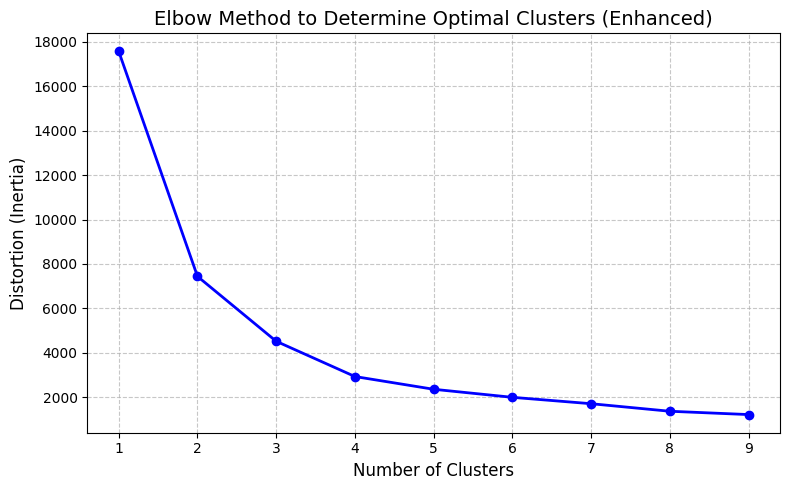

NameError: name 'hourly_cluster' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Enhanced K-Means Clustering Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grouped, x="hour", y="energy (Wh)", hue="Cluster", palette="Set1", s=50
)
plt.title("K-Means Clustering of Energy Consumption (Enhanced)", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Energy (Wh)", fontsize=12)
plt.legend(title="Cluster", loc="upper left", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Enhanced Elbow Method Visualization
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), distortions, marker="o", linestyle="-", color="blue", linewidth=2)
plt.title("Elbow Method to Determine Optimal Clusters (Enhanced)", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Distortion (Inertia)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Energy Consumption by Hour of Day (Enhanced Subplot)
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=hourly_cluster, x="hour", y="energy (Wh)", hue="Cluster", palette="Set2", marker="o"
)
plt.title("Average Energy Consumption by Hour of Day", fontsize=14)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Energy (Wh)", fontsize=12)
plt.legend(title="Cluster", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined CSV file
data = pd.read_csv('combined_data.csv')

# Parse the timestamp
data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'])
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month

# Step 1: Daily Trends
daily_trends = data.groupby('day')['energy (Wh)'].sum()
plt.figure(figsize=(10, 5))
daily_trends.plot(kind='line', title='Daily Energy Consumption')
plt.xlabel('Day')
plt.ylabel('Total Energy (Wh)')
plt.show()

# Step 2: Hourly Trends
hourly_trends = data.groupby('hour')['energy (Wh)'].mean()
plt.figure(figsize=(10, 5))
hourly_trends.plot(kind='bar', title='Average Hourly Energy Consumption')
plt.xlabel('Hour')
plt.ylabel('Average Energy (Wh)')
plt.show()

# Step 3: Monthly Trends
monthly_trends = data.groupby('month')['energy (Wh)'].sum()
plt.figure(figsize=(10, 5))
monthly_trends.plot(kind='bar', title='Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Total Energy (Wh)')
plt.show()

# Step 4: Heatmap for Hourly and Daily Consumption
heatmap_data = data.pivot_table(index='hour', columns='day', values='energy (Wh)', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Energy Consumption (Hourly and Daily)')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.show()

# Step 5: Box Plot for Energy Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='energy (Wh)', data=data)
plt.title('Energy Consumption Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Energy (Wh)')
plt.show()


<ipython-input-15-23ba169de167>:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'])


KeyError: 'Column not found: energy (Wh)'

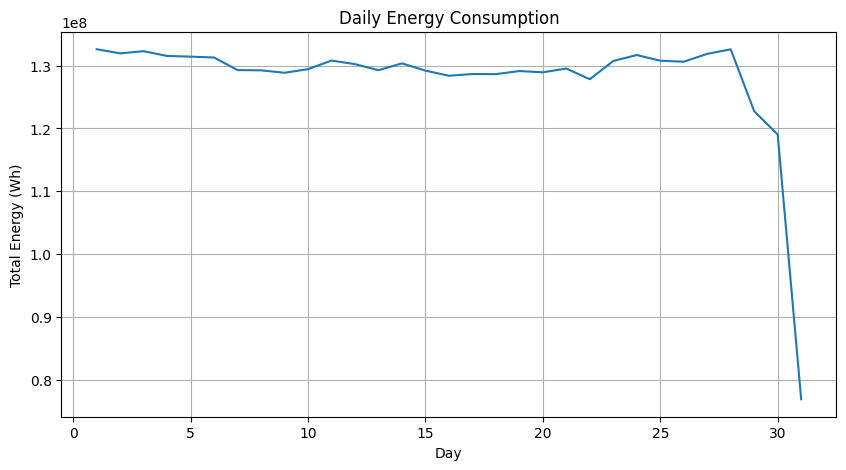

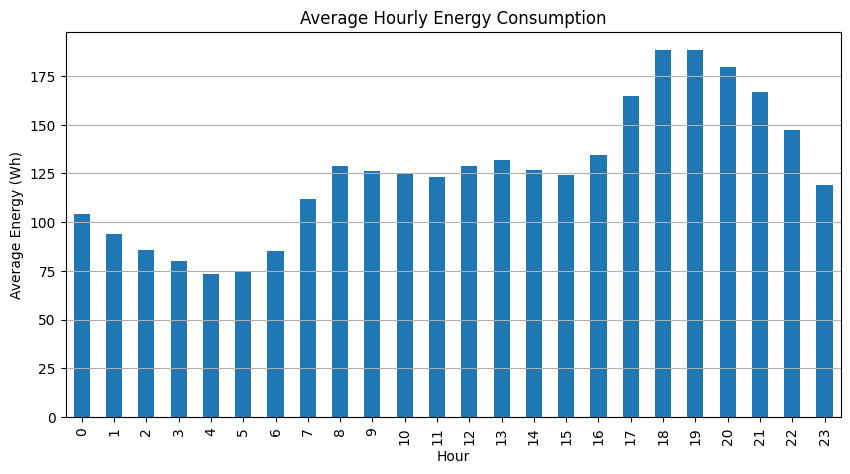

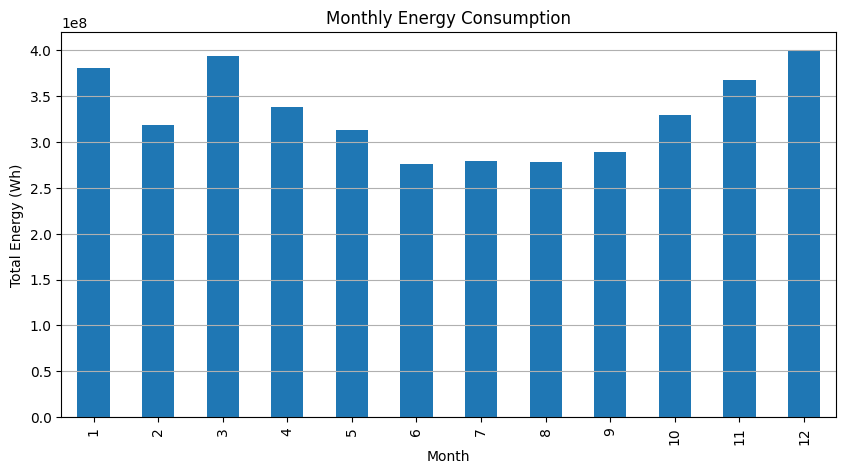

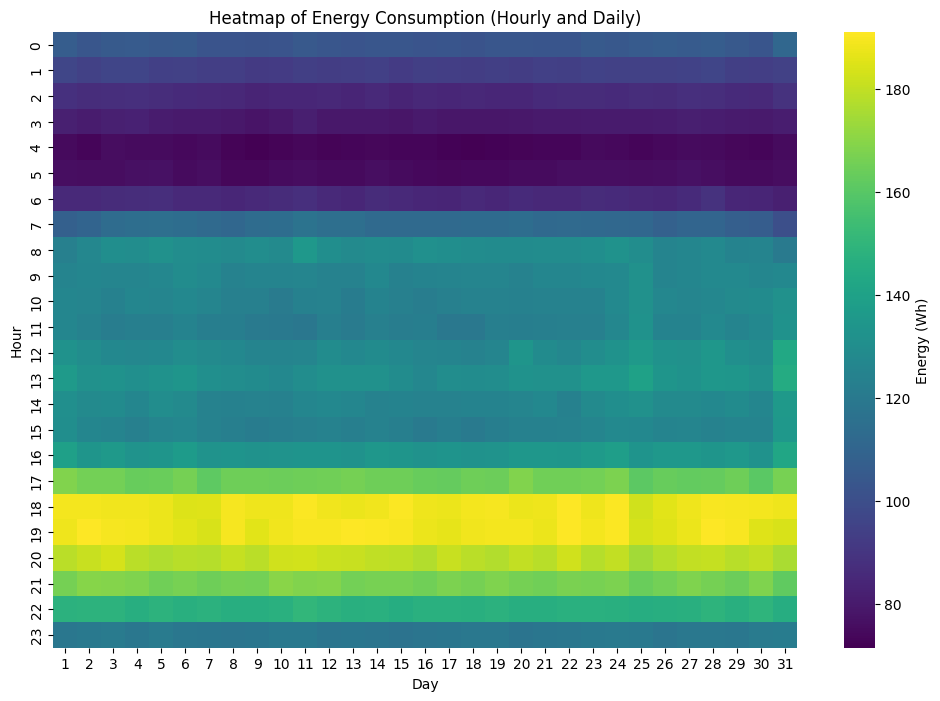

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined CSV file
data = pd.read_csv('combined_data.csv')

# Clean column names to remove any leading/trailing spaces
data.columns = data.columns.str.strip()

# Parse the timestamp
data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'], dayfirst=True)
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month

# Step 1: Daily Trends
daily_trends = data.groupby('day')['energy (Wh)'].sum()
plt.figure(figsize=(10, 5))
daily_trends.plot(kind='line', title='Daily Energy Consumption')
plt.xlabel('Day')
plt.ylabel('Total Energy (Wh)')
plt.grid()
plt.show()

# Step 2: Hourly Trends
hourly_trends = data.groupby('hour')['energy (Wh)'].mean()
plt.figure(figsize=(10, 5))
hourly_trends.plot(kind='bar', title='Average Hourly Energy Consumption')
plt.xlabel('Hour')
plt.ylabel('Average Energy (Wh)')
plt.grid(axis='y')
plt.show()

# Step 3: Monthly Trends
monthly_trends = data.groupby('month')['energy (Wh)'].sum()
plt.figure(figsize=(10, 5))
monthly_trends.plot(kind='bar', title='Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Total Energy (Wh)')
plt.grid(axis='y')
plt.show()

# Step 4: Heatmap for Hourly and Daily Consumption
heatmap_data = data.pivot_table(index='hour', columns='day', values='energy (Wh)', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, cbar_kws={'label': 'Energy (Wh)'})
plt.title('Heatmap of Energy Consumption (Hourly and Daily)')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.show()

# Step 5: Box Plot for Energy Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='energy (Wh)', data=data)
plt.title('Energy Consumption Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Energy (Wh)')
plt.grid(axis='y')
plt.show()


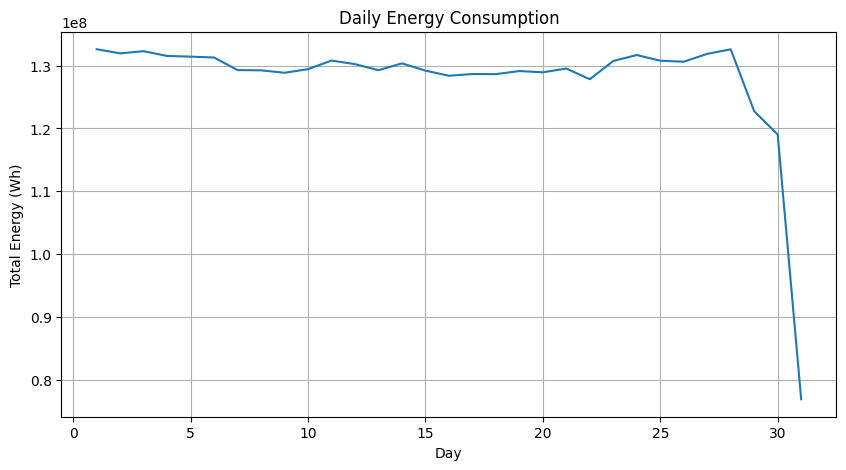

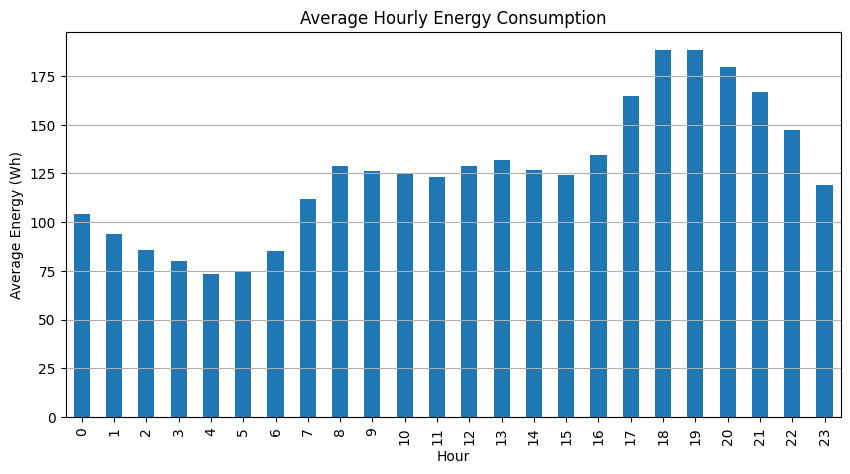

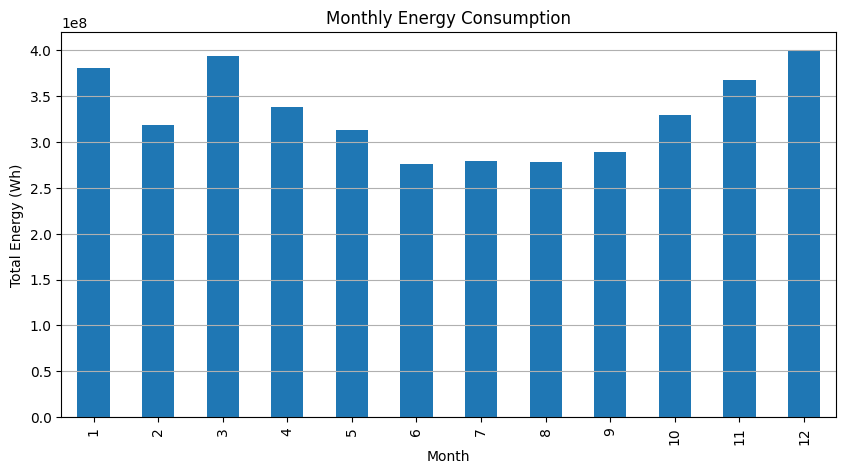

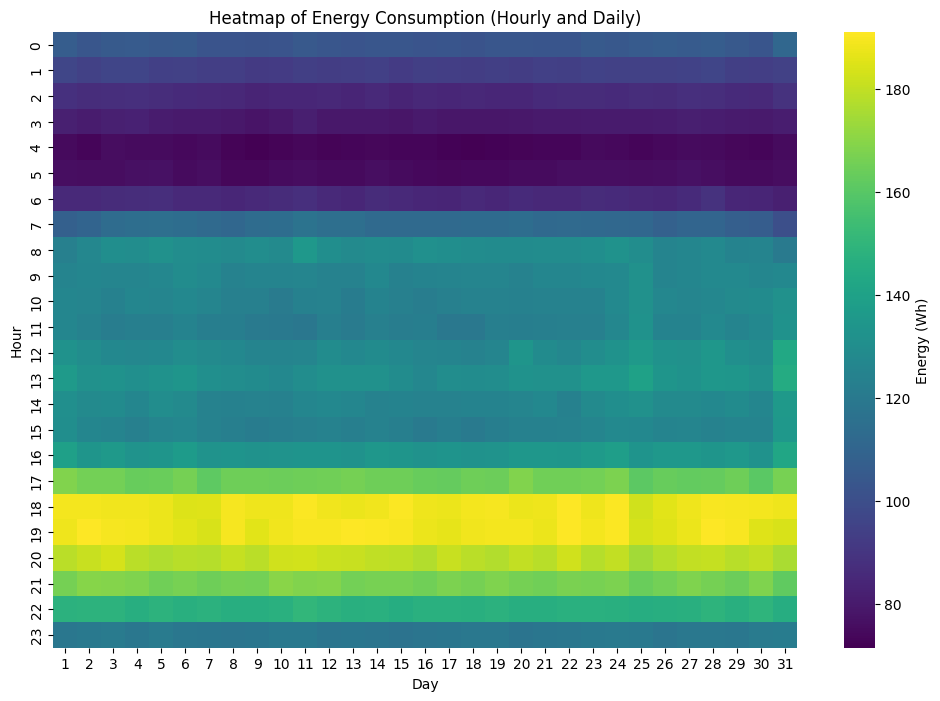

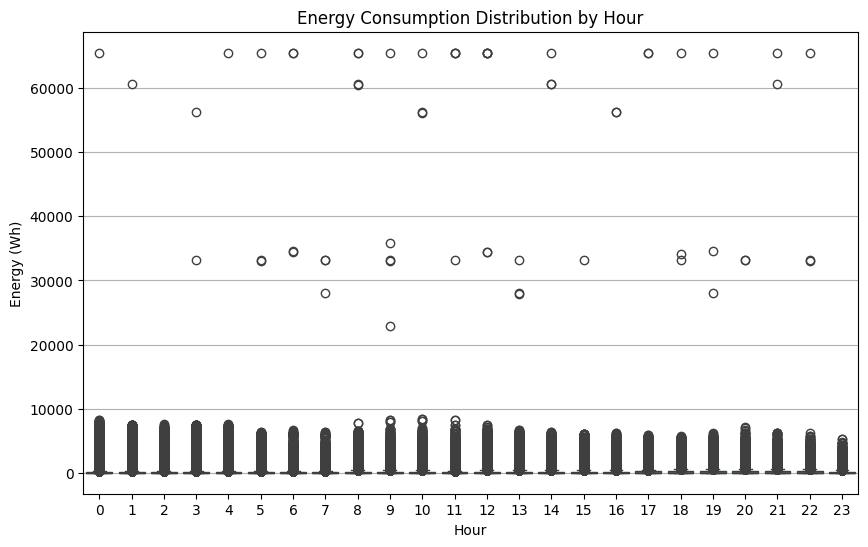

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined CSV file
data = pd.read_csv('combined_data.csv')

# Clean column names to remove any leading/trailing spaces
data.columns = data.columns.str.strip()

# Parse the timestamp
data['timestamp'] = pd.to_datetime(data['timestamp (dd/mm/yyyy hh:mm:ss)'], dayfirst=True)
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['month'] = data['timestamp'].dt.month

# Step 1: Daily Trends
daily_trends = data.groupby('day')['energy (Wh)'].sum()
plt.figure(figsize=(10, 5))
daily_trends.plot(kind='line', title='Daily Energy Consumption')
plt.xlabel('Day')
plt.ylabel('Total Energy (Wh)')
plt.grid()
plt.show()

# Step 2: Hourly Trends
hourly_trends = data.groupby('hour')['energy (Wh)'].mean()
plt.figure(figsize=(10, 5))
hourly_trends.plot(kind='bar', title='Average Hourly Energy Consumption')
plt.xlabel('Hour')
plt.ylabel('Average Energy (Wh)')
plt.grid(axis='y')
plt.show()

# Step 3: Monthly Trends
monthly_trends = data.groupby('month')['energy (Wh)'].sum()
plt.figure(figsize=(10, 5))
monthly_trends.plot(kind='bar', title='Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Total Energy (Wh)')
plt.grid(axis='y')
plt.show()

# Step 4: Heatmap for Hourly and Daily Consumption
heatmap_data = data.pivot_table(index='hour', columns='day', values='energy (Wh)', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, cbar_kws={'label': 'Energy (Wh)'})
plt.title('Heatmap of Energy Consumption (Hourly and Daily)')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.show()

# Step 5: Box Plot for Energy Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='energy (Wh)', data=data)
plt.title('Energy Consumption Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Energy (Wh)')
plt.grid(axis='y')
plt.show()


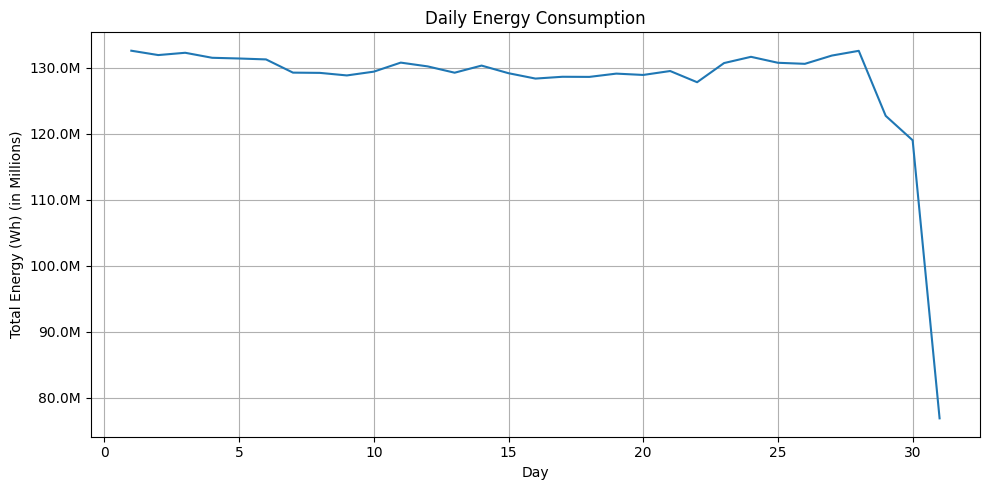

In [ ]:
import matplotlib.ticker as ticker

# Step 1: Daily Trends
daily_trends = data.groupby('day')['energy (Wh)'].sum()
plt.figure(figsize=(10, 5))
ax = daily_trends.plot(kind='line', title='Daily Energy Consumption')

# Format the y-axis to display values in millions (or another scale)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

plt.xlabel('Day')
plt.ylabel('Total Energy (Wh) (in Millions)')
plt.grid()
plt.tight_layout()
plt.show()
